### TP6 NN (OBLIGATORY)
 In this TP we will develop a two-layer fully-connected neural network to perform classification, and test it out on the CIFAR-10 dataset. We train the network with a softmax loss function. The network uses a sigmoid  activation function after the first fully connected layer. The outputs of the second fully-connected layer are the scores for each class.
 

In [0]:
import random
import numpy as np
from data_utils import load_IRIS, load_CIFAR10
from NN import NN
import timeit
import copy as cp

import matplotlib.pyplot as plt

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



 The CIFAR10 dataset contains 60,000 32x32 color images in 10 different classes ([CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10)) 

You have to download the dataset; open a terminal and go to the folder *datasets*, then execute the script *get_datasets.sh*:
```bash
$ ./get_datasets.sh
```

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# load cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
y_test = y_test.flatten()
y_train = y_train.flatten()

num_training = 5000
num_validation = 500
num_test = 500

mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
mask = list(range(num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]


# Normalize the data: subtract the mean image and divide by the std
mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)

X_train = X_train - mean_image
X_train = X_train / std_image
X_val = X_val - mean_image
X_val = X_val / std_image
X_test = X_test - mean_image
X_test = X_test/ std_image

# Reshape data to rows
X_train = X_train.reshape(num_training, -1)
X_val = X_val.reshape(num_validation, -1)
X_test = X_test.reshape(num_test, -1)


print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Clear previously loaded data.
Training data shape:  (5000, 3072)
Training labels shape:  (5000,)
Test data shape:  (500, 3072)
Test labels shape:  (500,)


### Instructions

We will use the class NN in the file NN.py to represent instances of our network. The network parameters are stored in the instance variable self.params where keys are string parameter names and values are numpy arrays. 

- Open the file NN.py and fill the missing parts of the NN.loss. This function takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. (You have to perform the forward pass, the backward pass).

- Fill the missing part in the NN.train(). 

- Implement the NN.predict method to predict labels for data points.



 - Set the number of the iteration (epochs) equal to 500 iteration and add a stopping criterion.
 - Train your network using 
     - learning rate 0.01
     - neurons in the hidden layer (hidden_size) : 1, 10, 100, 1000 
     - 1. online SGD, 2. SGD with mini batch = 200, 3. SGD with mini batch = 2000 3.mini\_batch = size of the training data set (Gradient Descent, GD)
     - for each case compute the validation accuracy and calculate the time it takes to train the network, comment.
     - Explain if and how the size of the hidden layer influences the prediction (validation  accuracy) and the computational time to train the network.
     - Explain if and how the batch  influences the prediction (validation accuracy) and the computational time to train the network.

- Find the best hyperparameters by tuning on the validation and for the best model
    - compute test accuracy
    - describe/ comment final model 
    - plot the history of the loss(train) 
    - plot the training and validation accuracy 
    - comment/ discuss


In [0]:
input_size = 32 * 32 * 3
num_classes = 10
hidden_size = [1,10,100,1000]
batchs = [1,200,2000,5000]
best_val = -1
best_history = None
results = {}

for hidden in hidden_size:
  for batch in batchs:
    print("Beginning with: hidden = %d, batch = %d" %(hidden,batch))

    start_time = timeit.default_timer()
    network = NN(input_size, hidden, num_classes)

    history = network.train(X_train,y_train,X_val,y_val,batch_size=batch)
    print('last loss hystory: for hidden = %d and batch = %d is %f' % (hidden,batch,history['loss_history'][-1])) 
    print('last Train acc hystory:for hidden = %d and batch = %d is %f' % (hidden,batch,history['train_acc_history'][-1]))
    print('last Val_acc_history: for hidden = %d and batch = %d is %f' % (hidden,batch,history['val_acc_history'][-1]))

    y_pred = network.predict(X_train)
    results[(hidden,batch)] = (history['train_acc_history'][-1],history['val_acc_history'][-1])

    if best_val < history['val_acc_history'][-1]:
      best_history = cp.deepcopy(history)
      best_val = cp.deepcopy(history['val_acc_history'][-1])
      best_network = cp.deepcopy(network)

    elapsed = timeit.default_timer() - start_time
    print('Time elapsed for hidden = %d and batch = %d  is: %f secondes'  % (hidden,batch,elapsed))
    print(" ")


for hidden,batch in sorted(results):
  train_accuracy, val_accuracy = results[(hidden, batch)]
  print('hidden: %d batch: %d train accuracy: %f val accuracy: %f' % (hidden, batch, train_accuracy, val_accuracy))

print('best validation accuracy achieved %f' % best_val)





Beginning with: hidden = 1, batch = 1
last loss hystory: for hidden = 1 and batch = 1 is 2.844553
last Train acc hystory:for hidden = 1 and batch = 1 is 1.000000
last Val_acc_history: for hidden = 1 and batch = 1 is 0.086000
Time elapsed for hidden = 1 and batch = 1  is: 0.165088 secondes
 
Beginning with: hidden = 1, batch = 200


/content/NN.py:42: RuntimeWarning: overflow encountered in exp
  return np.divide(1,(1+np.exp(-a)))


last loss hystory: for hidden = 1 and batch = 200 is 2.263035
last Train acc hystory:for hidden = 1 and batch = 200 is 0.125000
last Val_acc_history: for hidden = 1 and batch = 200 is 0.166000
Time elapsed for hidden = 1 and batch = 200  is: 0.836278 secondes
 
Beginning with: hidden = 1, batch = 2000
last loss hystory: for hidden = 1 and batch = 2000 is 2.302586
last Train acc hystory:for hidden = 1 and batch = 2000 is 0.120000
last Val_acc_history: for hidden = 1 and batch = 2000 is 0.100000
Time elapsed for hidden = 1 and batch = 2000  is: 0.094482 secondes
 
Beginning with: hidden = 1, batch = 5000
last loss hystory: for hidden = 1 and batch = 5000 is 2.302585
last Train acc hystory:for hidden = 1 and batch = 5000 is 0.114000
last Val_acc_history: for hidden = 1 and batch = 5000 is 0.100000
Time elapsed for hidden = 1 and batch = 5000  is: 0.277298 secondes
 
Beginning with: hidden = 10, batch = 1
last loss hystory: for hidden = 10 and batch = 1 is 9.978225
last Train acc hystory:f

/content/NN.py:110: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probabilitites[range(N), y])) #data loss
/content/NN.py:184: RuntimeWarning: invalid value encountered in double_scalars
  if abs(loss - loss_history[-1]) < 0.0001:


last loss hystory: for hidden = 1000 and batch = 1 is -0.000000
last Train acc hystory:for hidden = 1000 and batch = 1 is 1.000000
last Val_acc_history: for hidden = 1000 and batch = 1 is 0.112000


/content/NN.py:246: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/content/NN.py:247: RuntimeWarning: invalid value encountered in true_divide
  probabilitites = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


Time elapsed for hidden = 1000 and batch = 1  is: 9.324925 secondes
 
Beginning with: hidden = 1000, batch = 200
last loss hystory: for hidden = 1000 and batch = 200 is 7.310832
last Train acc hystory:for hidden = 1000 and batch = 200 is 0.375000
last Val_acc_history: for hidden = 1000 and batch = 200 is 0.256000
Time elapsed for hidden = 1000 and batch = 200  is: 68.639577 secondes
 
Beginning with: hidden = 1000, batch = 2000
last loss hystory: for hidden = 1000 and batch = 2000 is 1.773616
last Train acc hystory:for hidden = 1000 and batch = 2000 is 0.452000
last Val_acc_history: for hidden = 1000 and batch = 2000 is 0.428000
Time elapsed for hidden = 1000 and batch = 2000  is: 266.214403 secondes
 
Beginning with: hidden = 1000, batch = 5000
last loss hystory: for hidden = 1000 and batch = 5000 is 1.962881
last Train acc hystory:for hidden = 1000 and batch = 5000 is 0.329600
last Val_acc_history: for hidden = 1000 and batch = 5000 is 0.358000
Time elapsed for hidden = 1000 and batc

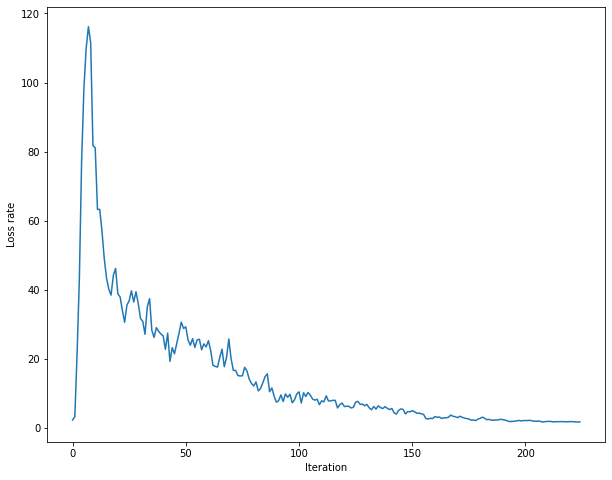

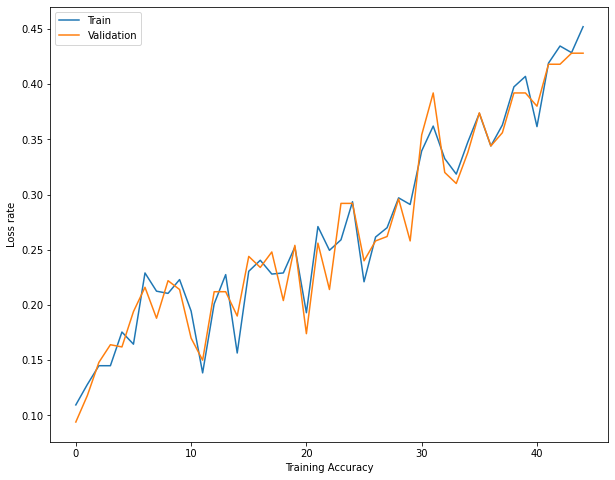

In [0]:
#### Plot the history of the loss and the train / validatoin accuracies
import matplotlib

# # Plot : Best history
x_axis = np.linspace(1,500,500)
plt.figure()
plt.plot(best_history['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss rate')
plt.show()


plt.figure()
plt.plot(best_history['train_acc_history'],label='Train')
plt.plot(best_history['val_acc_history'],label='Validation')
plt.xlabel('Training Accuracy') 
plt.ylabel('Loss rate')
plt.legend()
plt.show()


